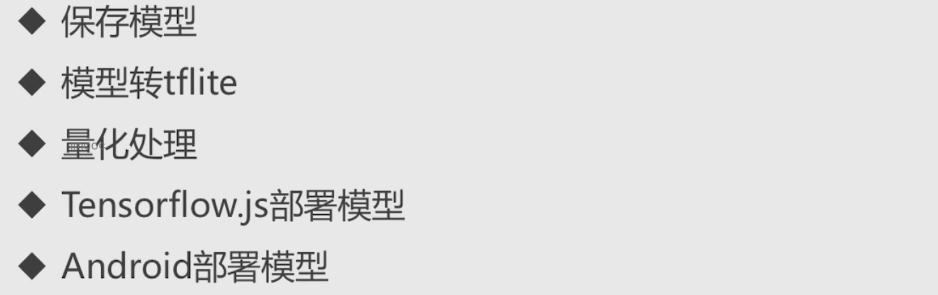

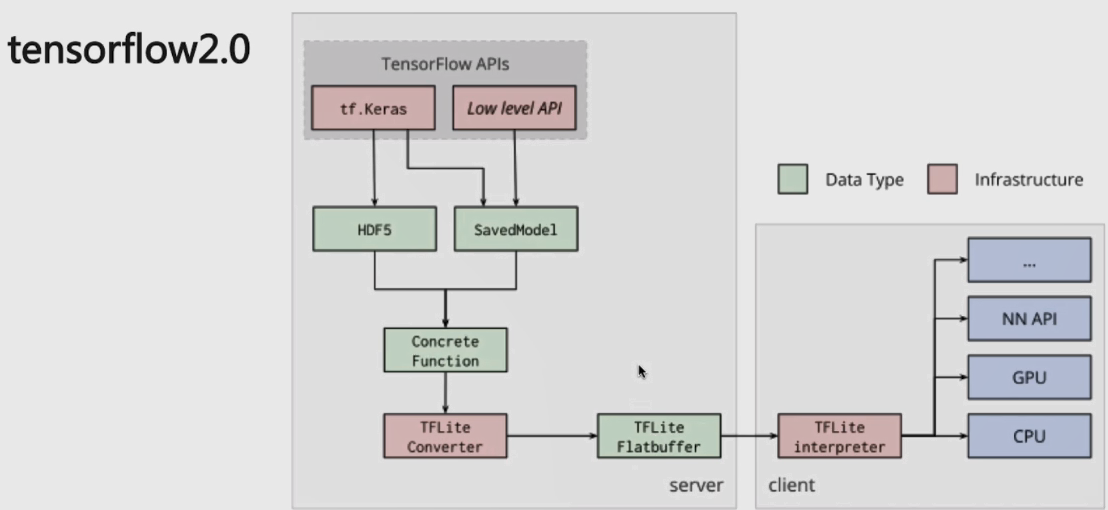

Concrete Function：函数签名生成

TFLite：处理模型，供给client

在客户端interpreter解释

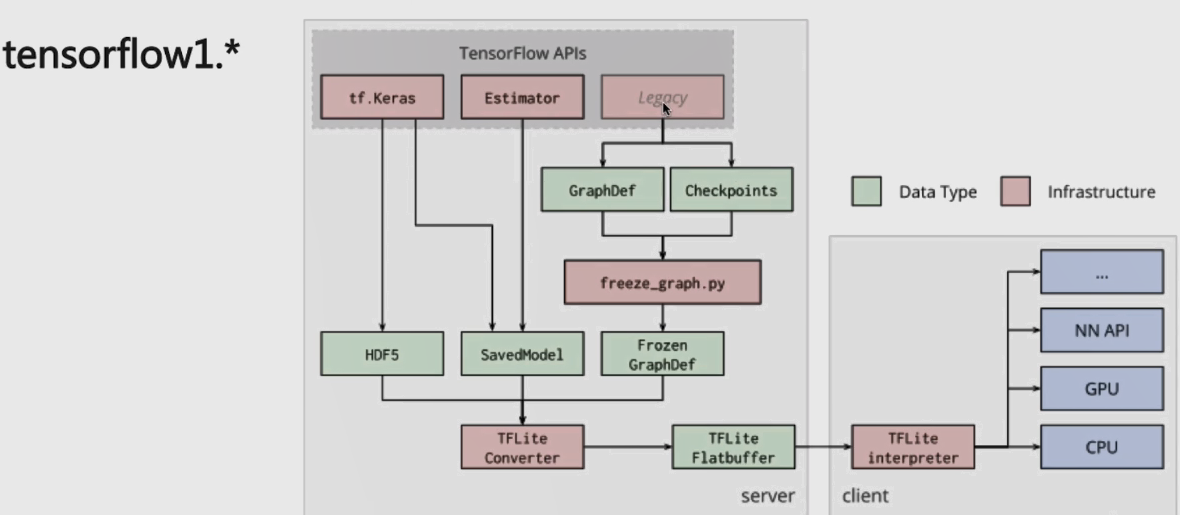

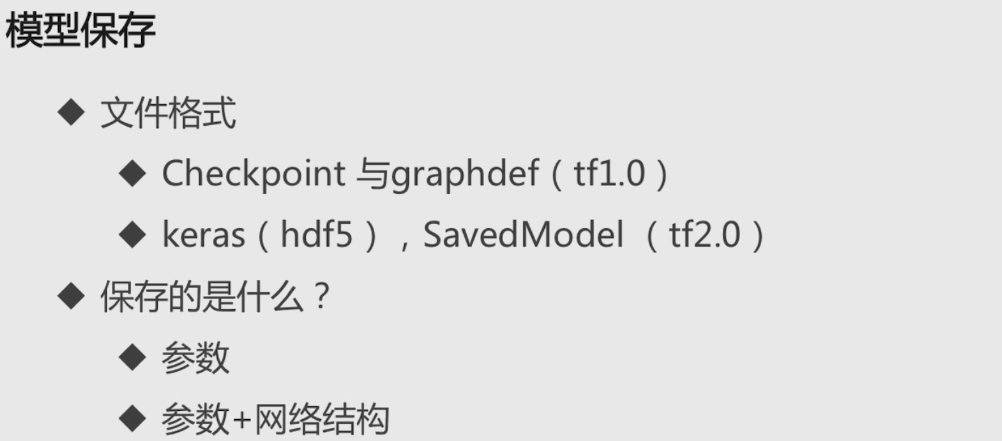

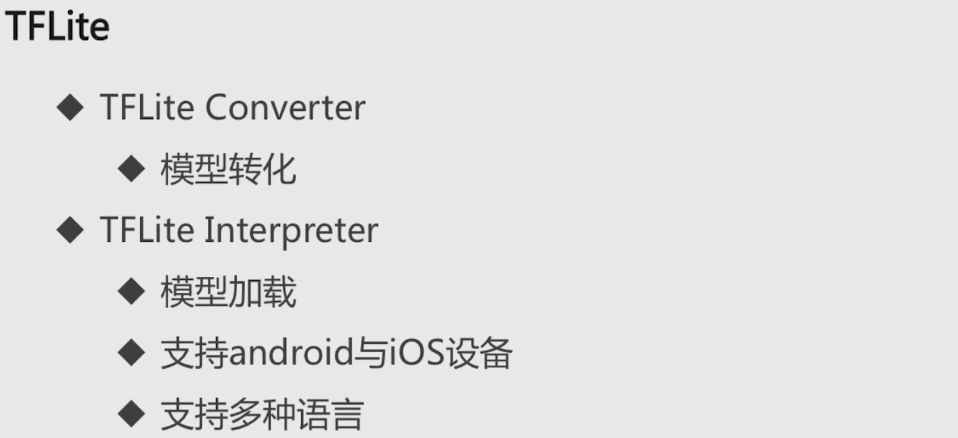

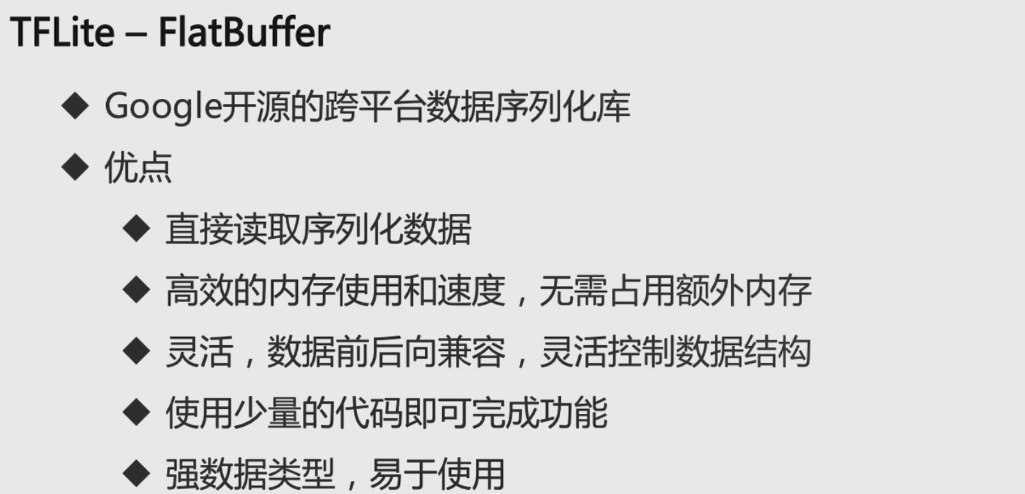

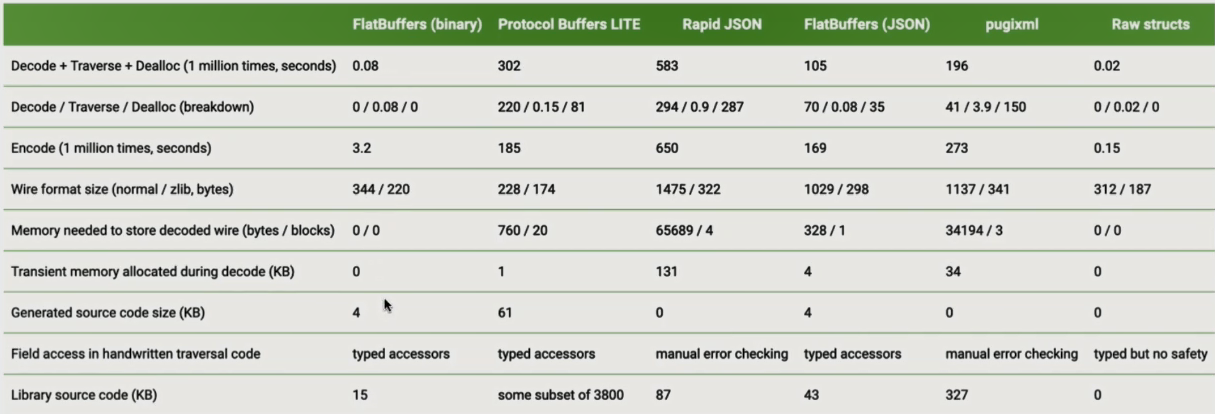

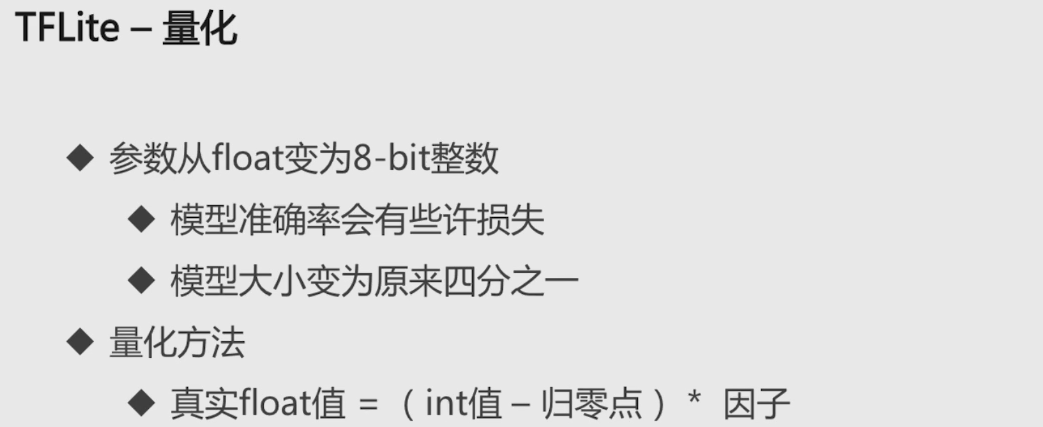

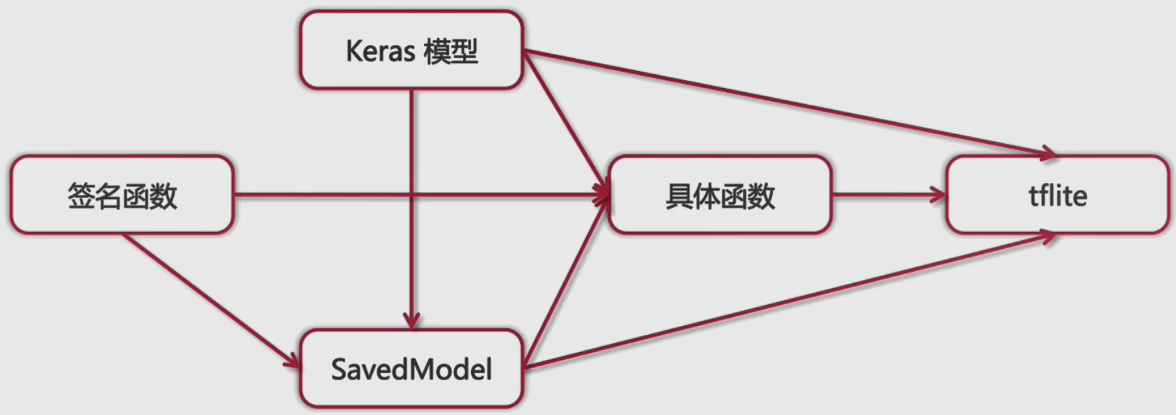

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import pandas as pd
import os, sys, time

import tensorflow as tf
from tensorflow import keras

%matplotlib inline

print(tf.__version__)
print(sys.version_info)

2.0.0
sys.version_info(major=3, minor=6, micro=8, releaselevel='final', serial=0)


In [ ]:
# callback保存

# model.save_weights

In [ ]:
# 图和参数都保存
keras.models.load_model()

# 只保存了参数
model.load_weights()

#### SavedModel

In [ ]:
tf.save_model.save(model, path)

In [ ]:
! saved_model_cli show --dir path --all

! saved_model_cli show --dir path --signature_def serving_default

In [ ]:
loaded = tf.saved_model.load(path)
loaded.signatures.keys()

In [ ]:
inference = loaded.signatures['serving_default']  # 推理部分

In [ ]:
inference.structured_outputs  # 输出节点

In [ ]:
res = inference(test_data)

##### 函数签名

In [ ]:
@tf.function(input_signature=[tf.TensorSpec([None], tf.int32, name='n_iters')])
def converge_to_two(n_iters):
    return tf.pow(n_iters, 3)

In [ ]:
to_export = tf.Module()
to_export.converge_to_two = converge_to_two
tf.saved_model.save(to_export, './sig_model')

imported = tf.saved_model.load('./sig_model')
imported.converge_to_two(tf.constant([3]))

##### 具体函数

In [ ]:
# 签名函数转为concrete_function
converge_to_two_init32 = converge_to_two.get_concrete_function(
    tf.TensorSpec([None], tf.int32))
print(converge_to_two_init32)

In [ ]:
converge_to_two_init32.graph

In [ ]:
converge_to_two_init32.graph.get_operations()

In [ ]:
# model转为concrete_function
run_model = tf.function(lambda x: load_model(x))

concrete_model = run_model.get_concrete_function(
    tf.TensorSpec(load_model.inputs[0].shape,
                            load_model.inputs[0].dtype)

SavedModel中保存的就是concrete function